## Import library yang dibutuhkan

In [186]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans  
from sklearn.preprocessing import LabelEncoder

## Koneksi colab dengan drive

In [187]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
path = "/content/drive/My Drive/Mall_Customers.csv"

Mounted at /content/drive


## Baca data dengan Pandas

In [188]:
df = pd.read_csv(path)
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


## Drop Kolom CustomerID

In [189]:
df.drop("CustomerID", axis=1, inplace = True)

## Label Encode kolom Gender

In [190]:
labelEncoder = LabelEncoder() 
df["Gender"] = labelEncoder.fit_transform(df["Gender"])
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40


## Elbow Criterion untuk mencari berapa jumlah cluster terbaik

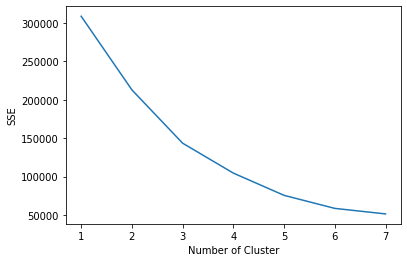

In [191]:
clusters = [1,2,3,4,5,6,7]
sse = {} # sum of squared error dictionary
cluster_centers = {}  # cluster point dictionary

for k in clusters:
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(df) # latih kmeans untuk setiap k
    df["clusters"+ str(k)] = kmeans.labels_ # catat hasil clustering untuk setiap data
    cluster_centers[str(k)] = kmeans.cluster_centers_ # catat posisi cluster center untuk setiap k
    sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center

plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of Cluster")
plt.ylabel("SSE")
plt.show()

## Plot hasil K-Means

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y, hue. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y, hue. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/di

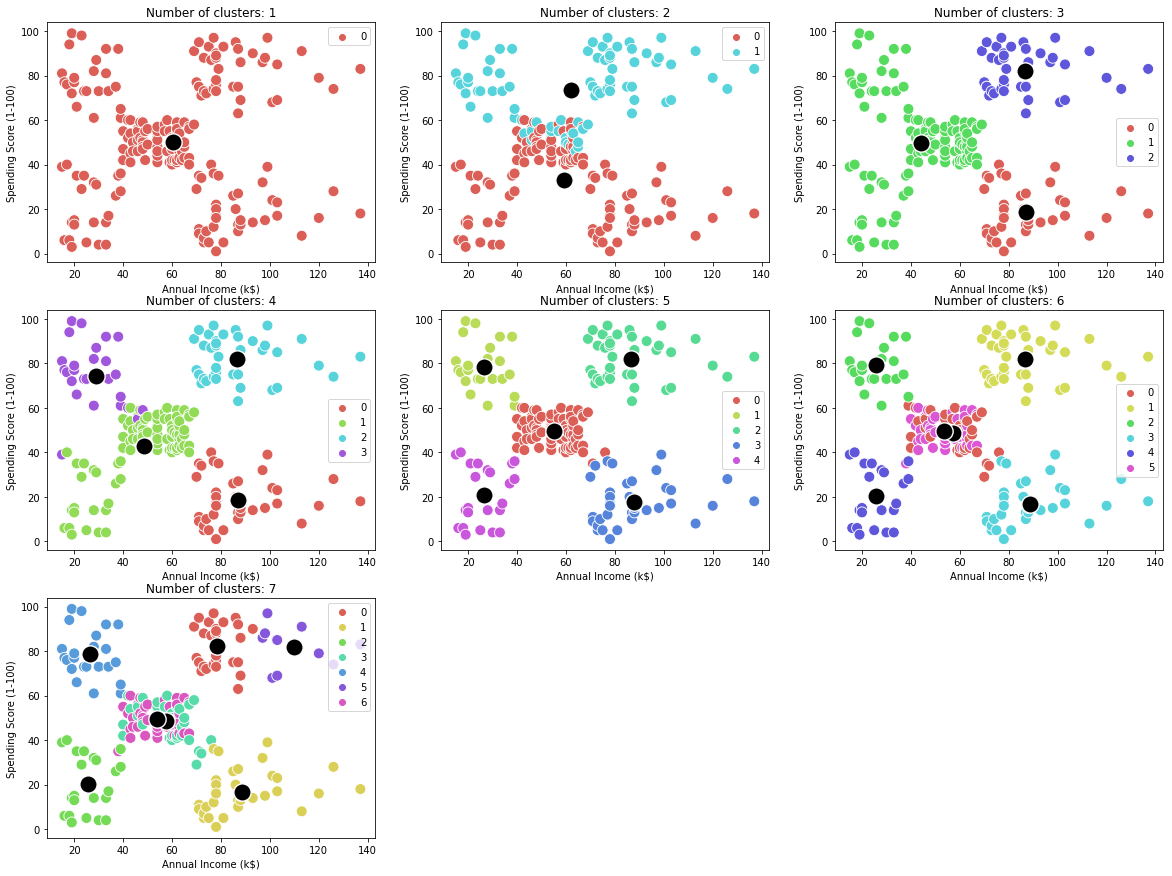

In [192]:
plt.figure(figsize=(20,15))

for i, k in enumerate(clusters):
    plt.subplot(3,3,i+1)
    sns.scatterplot(
      df["Annual Income (k$)"], 
      df["Spending Score (1-100)"], 
      df['clusters' + str(k)], s=120, 
      palette=sns.color_palette("hls", k)
    )

    sns.scatterplot(
      cluster_centers[str(k)][:,2], 
      cluster_centers[str(k)][:,3], 
      color='black', s=300
    ) # 3 dan 4 karena kolom yg di plot kolom 2 dan kolom 3
    plt.title('Number of clusters: ' + str(k))
    
plt.show()

## Analisis Cluster (Setiap RUN bisa berubah label 0,1,2,3,4 tetapi inti analisisnya sama)
dari ketujuh scatterplot untuk tiap nilai K, terlihat bahwa K=5 membagi data ke 5 kelas dengan baik. Oleh karena itu bisa dianalisis setiap klaster mewakili apa.

## Klaster dengan label 0.
Annual Income rata-rata dari klaster 0 adalah 55.291139, dengan spending score 49.569620 dari 100. 

Untuk sementara karena nilai rata-rata annual income belum terlihat apakah termasuk tinggi atau rendah, maka dibiarkan dahulu

Spending score berkisar di 49.5, atau setengah dari max score 100, maka untuk sementara dikatakan 'moderate spender' 

In [193]:
df[df["clusters5"] == 0].mean()

Gender                     0.417722
Age                       43.088608
Annual Income (k$)        55.291139
Spending Score (1-100)    49.569620
clusters1                  0.000000
clusters2                  0.291139
clusters3                  0.974684
clusters4                  1.075949
clusters5                  0.000000
clusters6                  2.721519
clusters7                  4.632911
dtype: float64

## Klaster dengan label 1.
Annual Income rata-rata dari klaster 1 adalah 26.304348	, dengan spending score 78.565217	 dari 100. 

nilai rata-rata annual income terlihat lebih rendah dari klaster 0, maka dikatakan klaster 1 termasuk ke 'low income'

Spending score berkisar di 78.565217, atau dekat dengan max score 100, maka dikatakan 'aggresive spender' 

In [194]:
df[df["clusters5"] == 1].mean()

Gender                     0.391304
Age                       25.521739
Annual Income (k$)        26.304348
Spending Score (1-100)    78.565217
clusters1                  0.000000
clusters2                  1.000000
clusters3                  1.000000
clusters4                  3.000000
clusters5                  1.000000
clusters6                  1.913043
clusters7                  4.000000
dtype: float64

## Klaster dengan label 2.
Annual Income rata-rata dari klaster 2 adalah 86.538462, dengan spending score 82.128205 dari 100. 

nilai rata-rata annual income terlihat lebih tinggi dari klaster 0, maka dikatakan klaster 2 termasuk ke 'high income'

Spending score berkisar di 82.128205, dekat dengan max score 100, maka dikatakan 'aggresive spender' 

In [195]:
df[df["clusters5"] == 2].mean()

Gender                     0.461538
Age                       32.692308
Annual Income (k$)        86.538462
Spending Score (1-100)    82.128205
clusters1                  0.000000
clusters2                  1.000000
clusters3                  2.000000
clusters4                  2.000000
clusters5                  2.000000
clusters6                  1.000000
clusters7                  1.282051
dtype: float64

## Klaster dengan label 3.
Annual Income rata-rata dari klaster 3 adalah 87.750000	, dengan spending score 17.583333	 dari 100. 

nilai rata-rata annual income terlihat lebih tinggi dari klaster 0, maka dikatakan klaster 3 termasuk ke 'high income'

Spending score berkisar di 17.583333, atau jauh rendah dari max score 100, maka dikatakan 'passive spender' 

In [196]:
df[df["clusters5"] == 3].mean()

Gender                     0.527778
Age                       40.666667
Annual Income (k$)        87.750000
Spending Score (1-100)    17.583333
clusters1                  0.000000
clusters2                  0.000000
clusters3                  0.000000
clusters4                  0.000000
clusters5                  3.000000
clusters6                  2.833333
clusters7                  1.111111
dtype: float64

## Klaster dengan label 4.
Annual Income rata-rata dari klaster 4 adalah 26.304348, dengan spending score 20.913043 dari 100. 

nilai rata-rata annual income terlihat lebih rendah dari klaster 0, maka dikatakan klaster 4 termasuk ke 'low income'

Spending score berkisar di 20.913043, atau jauh rendah dari max score 100, maka dikatakan 'passive spender' 

In [197]:
df[df["clusters5"] == 4].mean()

Gender                     0.391304
Age                       45.217391
Annual Income (k$)        26.304348
Spending Score (1-100)    20.913043
clusters1                  0.000000
clusters2                  0.000000
clusters3                  1.000000
clusters4                  1.086957
clusters5                  4.000000
clusters6                  4.043478
clusters7                  2.173913
dtype: float64

## Hasil Analisis
Dari analisis diatas, dapat dikatakan 5 label pada klaster-klaster yang terbentuk mewakili:

0 -> moderate income moderate spender (neutral)

1 -> low income aggresive spender

2 -> high income aggresive spender

3 -> high income passive spender

4 -> low income passive spender

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y, hue. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


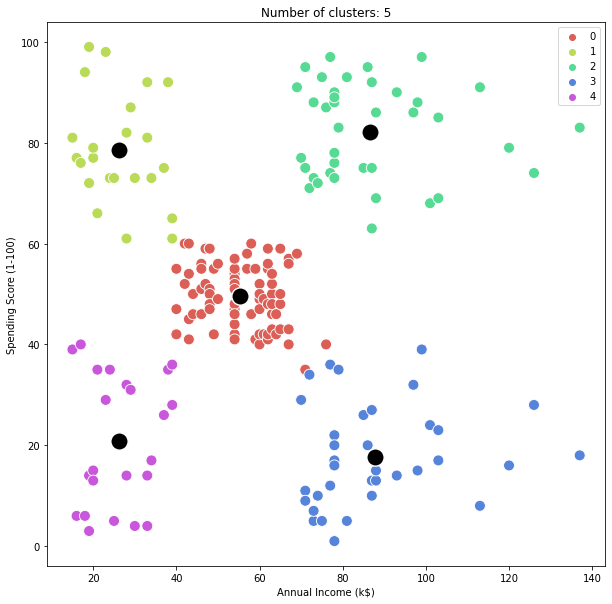

In [198]:
plt.figure(figsize=(10,10))

sns.scatterplot(
  df["Annual Income (k$)"], 
  df["Spending Score (1-100)"], 
  df['clusters5'], s=120, 
  palette=sns.color_palette("hls", 5)
)

sns.scatterplot(
  cluster_centers[str(5)][:,2], 
  cluster_centers[str(5)][:,3], 
  color='black', s=300
) 
plt.title('Number of clusters: ' + str(5))
    
plt.show()